In [34]:
#importing stuffs yeye
import matplotlib.pyplot as plt
import numpy as np #python library for numbers (lists, math, calc, arrays)
import pandas as pd #used for storing data in tables, filtering, storing, manipulating data (like the excel of data in python)
from sklearn.datasets import fetch_california_housing, load_iris #library for helping with machine learning in general
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

In [5]:
data = fetch_california_housing(as_frame = True)
print(data.frame.head()) #head is the first 5 pieces of data
print(data.frame.describe()) #the mean, std, min, etc.. like stats
print(data.feature_names)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [14]:
X = data.frame[['MedInc']] #always use capital X in ML
y = data.frame['MedHouseVal']

print(X.head())
print(y.head())

   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [16]:
#test split
#method: predefined function that returns a value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #20 percent of data is testing. 80 percent of x is matched to 80 percent of y
#random state determines what the random number is. so everytime the numbers are randomized ,it looks the same everytime (called seed number)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}") #f string allows you to embed variables using curly braces into the print

Training set size: 16512, Test set size: 4128


In [17]:
model = LinearRegression().fit(X_train, y_train) #making best fit model
y_pred = model.predict(X_test) #ypred says your prediction labels the x test value into the y. predicts y based on x

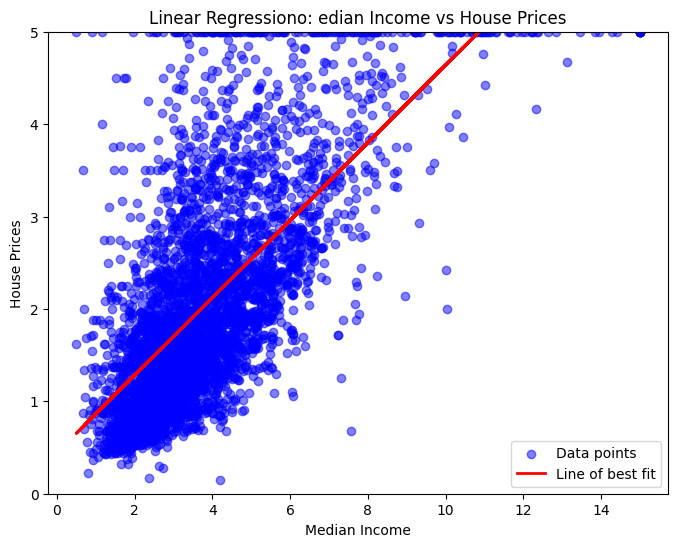

In [18]:
#instead of printing normally, you can do this. normal print wont let you know whats happening
plt.figure(figsize = (8, 6))
plt.scatter(X_test, y_test, color = 'blue', alpha = 0.5, label = 'Data points')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2, label = 'Line of best fit')
plt.ylim(0,5) #setting y-axis max to 5
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Linear Regressiono: edian Income vs House Prices')
plt.legend()
plt.show()

In [19]:
scaler = StandardScaler() #makes everything have mean of 0 and std of 1. imported from sklearn
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
ridge = Ridge(alpha = 1.0).fit(X_train_scaled, y_train) #ridge gives the linear regression model a penalty for going overfit. dont be too smart and overfit the thing. dont be smart butt with outliers
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")

Mean Squared Error (Ridge Regression): 0.7091


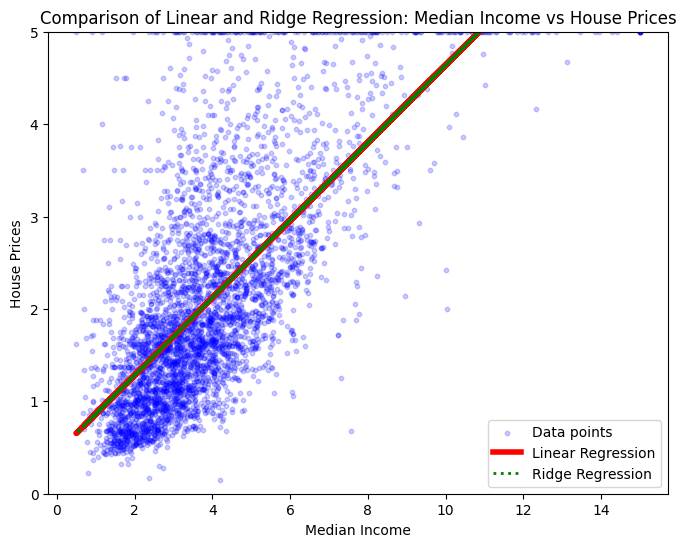

In [26]:
plt.figure(figsize = (8, 6))
plt.scatter(X_test, y_test, color = 'blue', alpha = 0.2, s = 10, label = 'Data points')
plt.plot(X_test, y_pred, color = 'red', linewidth = 4, label = 'Linear Regression')
plt.plot(X_test, y_pred_ridge, color = 'green', linestyle = 'dotted', linewidth = 2, label = 'Ridge Regression')
plt.ylim(0,5)
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Comparison of Linear and Ridge Regression: Median Income vs House Prices')
plt.legend()
plt.show()

In [29]:
iris = load_iris(as_frame = True)
print(iris.frame.head())
print(iris.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
X = iris.data[['sepal length (cm)', 'sepal width (cm)']] #double square brackets for 3D rather than 2D
y = iris.target

print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [32]:
X_scaled = StandardScaler().fit_transform(X)
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_scaled, y) #knn is K Nearest Neighbors uses numbers of nearby data points. k is number of nearest neighbors

In [37]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 0].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #meshgrid makes a 2D grid of all the points on a plot

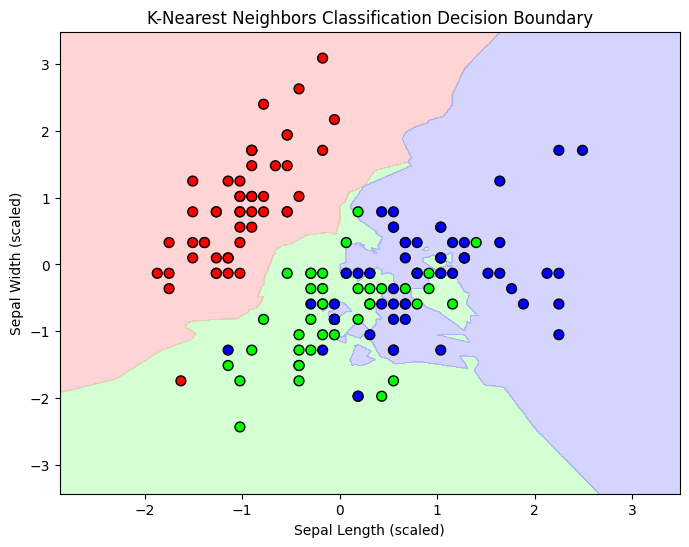

In [40]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #or have a second line that says Z = z.reshape(xx.shape)

plt.figure(figsize = (8, 6))
plt.contourf(xx, yy, Z, alpha = 0.5, cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y, cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors = 'k', s = 50)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Nearest Neighbors Classification Decision Boundary')
plt.show()

Today, we trained three models for regression and linear lines